# Introduction to Data Science

### Who, What, Where, When, and Why on the following datasets:

* Baseball-reference.com
* International Movie Database (IMBb)
* Google ngrams
* NYC taxi cab records

### Let's focus on IMBb dataset 

The dataset is available at: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

### What is the dataset about?

The dataset contains information about 5000 movies, including their budget, gross revenue, director, actors, IMBb rating, and more. 

First, let's import the libraries we will need for this analysis.

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [43]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Then we would use pandas to read the csv file:

In [44]:
movies = pd.read_csv('https://raw.githubusercontent.com/vrughetti/python4DS/main/data/movie_metadata.csv', encoding='utf-8')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


We can use the head() function to see the first 5 rows of the dataset or tail() function to see the last 5 rows of the dataset. 

Now let's see how many rows and columns are in the dataset as well as the column names.

In [45]:
print(f"Columns: {movies.columns}\n")
rows, columns = movies.shape
print(f"Rows: {rows}, Columns: {columns}")

Columns: Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Rows: 5043, Columns: 28


We can remove duplicate rows using the drop_duplicates() function and then check the number of rows and columns again.

In [46]:
movies = movies.drop_duplicates()
movies.shape

(4998, 28)

Then we will filter our dataset to only include movies that have a huge amount of reviews. It is quite common to include the most reviewed movies in the analysis because they are the most popular movies aswell. Also there is a notable difference between a movie rated by 10 users and a movie rated by 100,000 users...

But before chosing a threshold, let's see some statistics about our dataset and especially the number of votes/reviews.

In [47]:
movies['num_voted_users'].describe()

count    4.998000e+03
mean     8.347020e+04
std      1.380866e+05
min      5.000000e+00
25%      8.560000e+03
50%      3.426050e+04
75%      9.612075e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64

Using the describe() function, we can get some statistics about the dataset which includes the mean, standard deviation, minimum, maximum, and quartiles for each column (`num of voted users` in our case).

Let's visualize the distribution of the number of voted users using a histogram. We will use some pandas methods which are quite good for fast data exploration and visualization.

<Axes: title={'center': 'Distribution of Number of Voted Users'}, xlabel='Number of Voted Users', ylabel='Frequency'>

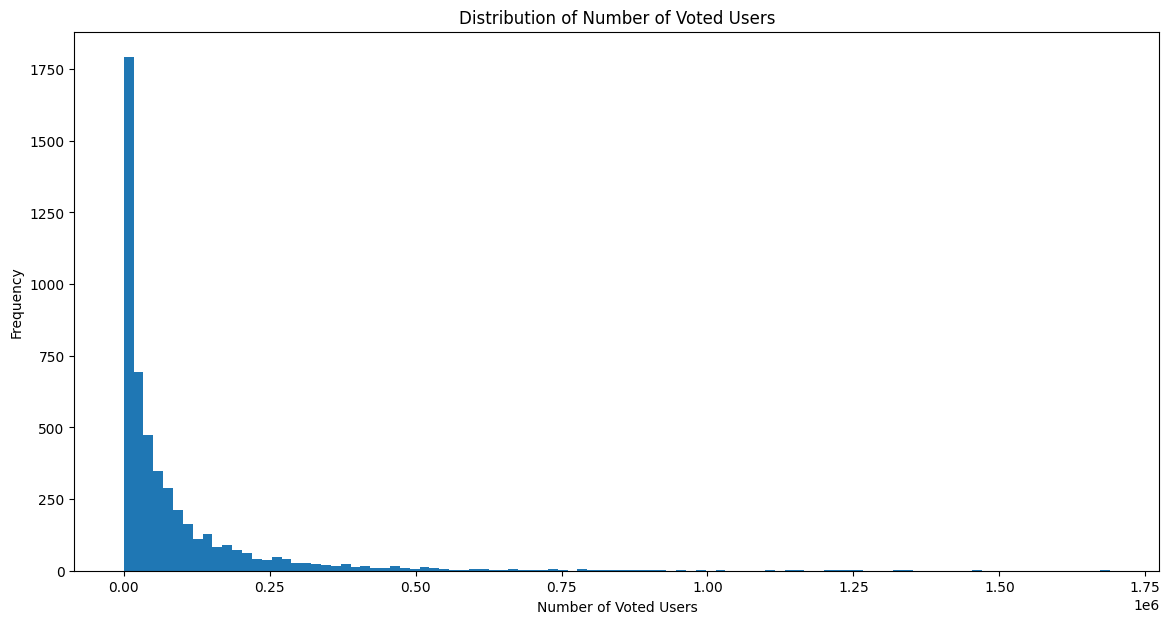

In [48]:
movies['num_voted_users'].plot(kind='hist', bins=100, figsize=(14, 7), xlabel='Number of Voted Users', title='Distribution of Number of Voted Users')

We can see that the distribution is skewed to the right. This means that most of the movies have a small number of votes. We will use the median to filter our dataset.

In [56]:
voted_movies = movies[movies['num_voted_users'] > movies['num_voted_users'].median()]
voted_movies.head(7) # note here that we can specify the number of rows to display in the head() function

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000


In [57]:
print(f"Rows: {voted_movies.shape[0]}, Columns: {voted_movies.shape[1]}")

Rows: 2499, Columns: 28


> Note how we went from 5000 movies to just 2500 movies. This is because we removed movies by using median instead of mean. The median is less sensitive to outliers than the mean.

Now, going back to the original question:
### Can we predict how well people will like a movie? What about its gross?

Let's start by looking at the correlation between the IMBb rating and the gross revenue.

In [ ]:
corr_matrix = voted_movies.corr() # this will throw an error because there are non-numeric columns in the dataframe. We need to remove them first!

We will select only the columns we are interested in and then use the corr() function to compute the correlation between them.

In [69]:
corr_movies = voted_movies.select_dtypes(include=['float64', 'int64']) # this is a great way to select only numerical columns in a dataframe avoiding the need to specify each column name individually with drop() method or with slicing notation (i.e. movies.iloc[:, 3:])
corr_movies.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


Now for plotting the correlation matrix, we will use the seaborn library which is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

If you do not have seaborn installed, you can install it using the following command:

`%pip install -U seaborn` where pip is a package management system used to install and manage software packages written in Python. 
> -U stands for upgrade.

In [ ]:
%pip install -U seaborn
import seaborn as sns # sns is the standard alias for seaborn

We will use the heatmap() function to plot the correlation matrix.

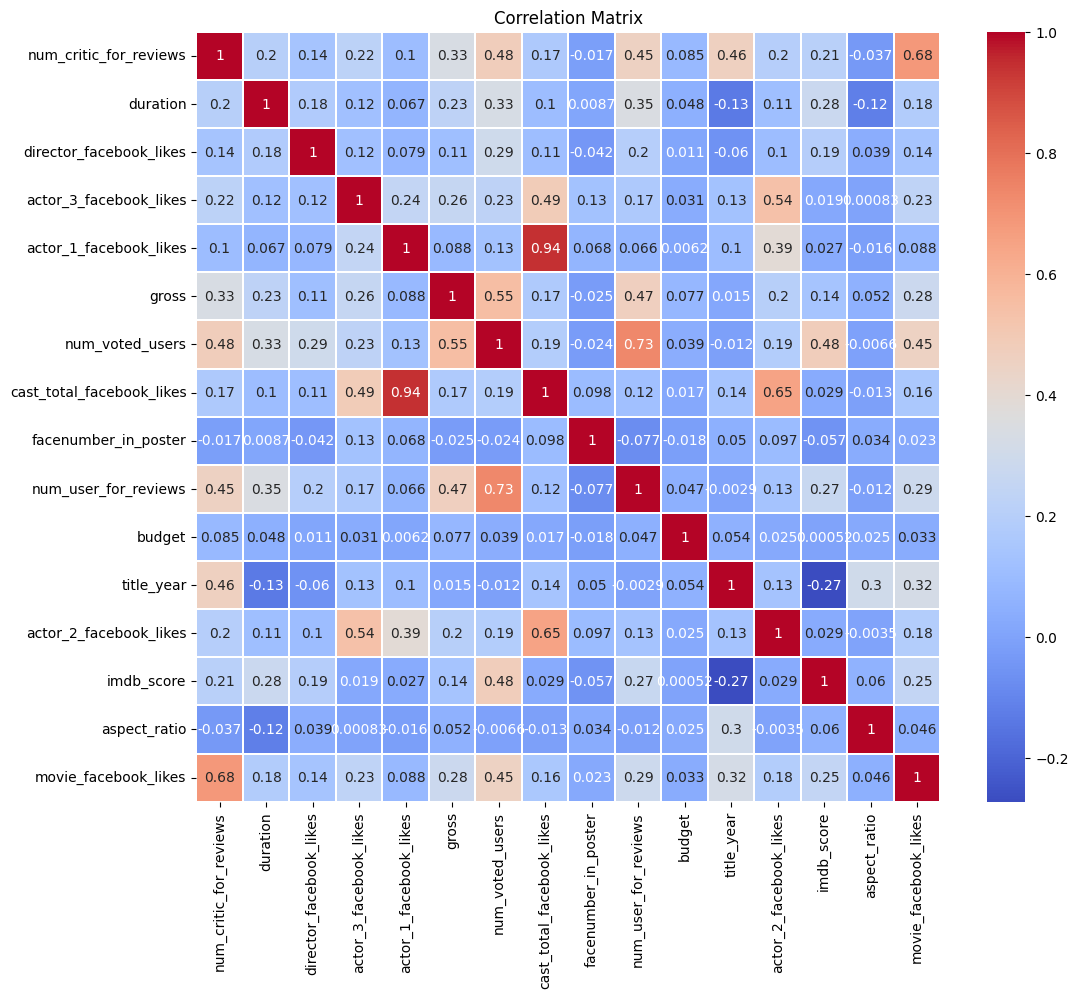

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_movies.corr(), annot=True, cmap='coolwarm', linewidths=0.2) # annot=True will display the correlation values in the heatmap
plt.title('Correlation Matrix')
plt.show()

We can make some considerations about what we see in the correlation matrix. For example: 
* The number of voted users is correlated with the gross revenue. This makes sense because the more people vote for a movie, the more people watch it and the more money it makes.
* The number of voted users is also correlated with the number of reviews by critics. This makes sense because the more people vote for a movie, the more people talk about it and the more critics write about it.
* The number of voted users is also correlated with the number of users who gave a rating. This makes sense because the more people vote for a movie, the more people give it a rating.
* It's interesting to see that the movie year is negatively correlated with the IMBb rating. This means that the older the movie, the lower the rating. This is probably because people tend to rate recent movies more than old movies.
* The number of voted users is also correlated with the IMBb rating. This makes sense because the more people vote for a movie, the more accurate the rating is.
* We won't go through all the correlations but you can do it yourself and see what you can find. Obviously, correlations about facebook likes and actors facebook likes are not very interesting because they are not related to the movie itself and also they are highly correlated with each other.

Now you should have a better idea of what data science is about and how to use Python for data analysis. Especially how to use tools like pandas for exploring and visualizing data and seaborn for visualizing correlations. 

### **What's next?**

You can try to answer the following questions:
* What is the average IMBb rating for each genre?
* What is the average gross revenue for each genre?
* What is the average IMBb rating for each director?
* What is the average gross revenue for each director?
* What is the average IMBb rating for each actor?
* What is the average gross revenue for each actor?
* What is the average IMBb rating for each actor/director combination?
* What is the average gross revenue for each actor/director combination?
* What is the average IMBb rating for each actor/director/genre combination?

And so on...

**Keep in mind** that `correlation does not imply causation`. For example, the number of voted users is correlated with the gross revenue but it does not mean that the number of voted users causes the gross revenue. It could be the other way around. Or it could be that both are caused by something else. Or it could be just a coincidence. A lot of people make the mistake of thinking that correlation implies causation. So be careful when you interpret the results of your analysis.

Also remember that simple is better. While doing data analysis, you will be tempted to use complex models and algorithms. But most of the time, simple models and algorithms work better. So try to keep it simple. Make sure everyone can understand what you have done and why you have done it. That's how you will achieve the best results :)

---

# What's next?

Next notebook: [Introduction to Google Colab](https://github.com/vrughetti/python4DS/blob/main/notebooks/google_colab/colab.ipynb)

### What about Pandas?
We will use pandas with a more in depth approach in the Pandas UltraQuick Tutorial notebook.